In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from sklearn.linear_model import LogisticRegression

In [7]:
data = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/five_minute.csv", parse_dates=["time"], index_col="time")

In [8]:
data["returns"] = np.log(data.div(data.shift(1)))

In [10]:
data.dropna(inplace=True)

In [11]:
data["direction"] = np.sign(data["returns"])

In [16]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048
...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022


In [13]:
data["direction"].value_counts()

 1.0    36064
-1.0    35708
 0.0     1947
Name: direction, dtype: int64

In [14]:
lags = 5

In [15]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    data[col] = data["returns"].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [20]:
lm = LogisticRegression(C = 1e6, max_iter=100000, multi_class="ovr")

In [21]:
lm.fit(data[cols], data["direction"])

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [22]:
data["pred"] = lm.predict(data[cols])

In [23]:
data

,price,returns,direction,lag1,lag2,lag3,lag4,lag5,pred
time,,,,,,,,,
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,0.000000,-0.000026,-0.000201,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,0.000183,0.000000,-0.000026,1.0
2019-01-01 22:40:00+00:00,1.146370,-0.000074,-1.0,0.000000,-0.000017,-0.000048,0.000183,0.000000,-1.0
2019-01-01 22:45:00+00:00,1.146315,-0.000048,-1.0,-0.000074,0.000000,-0.000017,-0.000048,0.000183,1.0
2019-01-01 22:50:00+00:00,1.146475,0.000140,1.0,-0.000048,-0.000074,0.000000,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,0.000022,-0.000004,0.000089,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,-0.000018,0.000022,-0.000004,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-0.000112,-0.000018,0.000022,1.0


In [24]:
data["pred"].value_counts()

 1.0    41397
-1.0    32317
Name: pred, dtype: int64

In [25]:
hits = np.sign(data["direction"] * data["pred"]).value_counts()

In [26]:
hits

 1.0    37620
-1.0    34148
 0.0     1946
dtype: int64

In [27]:
hit_raio = hits[1.0] /sum(hits)

In [28]:
hit_raio

0.5103508153132377

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_true=data["direction"], y_pred=data["pred"])

0.5103508153132377

# In Sample BackTesting

In [32]:
data["strategy"] = data["pred"] * data["returns"]

In [33]:
data['creturns'] = data['returns'].cumsum().apply(np.exp)
data['cstrategy'] = data['strategy'].cumsum().apply(np.exp)

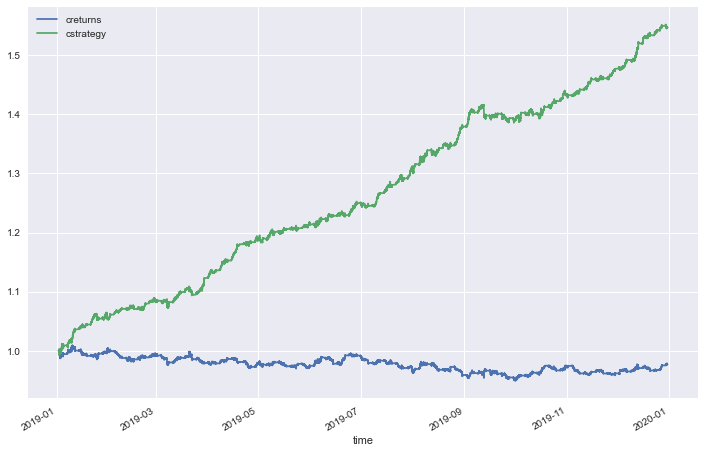

In [35]:
data[['creturns', 'cstrategy']].plot(figsize=(12,8))
plt.show()

In [36]:
data["pred"].diff()

time
2019-01-01 22:30:00+00:00    NaN
2019-01-01 22:35:00+00:00    0.0
2019-01-01 22:40:00+00:00   -2.0
2019-01-01 22:45:00+00:00    2.0
2019-01-01 22:50:00+00:00    0.0
                            ... 
2019-12-30 23:35:00+00:00    0.0
2019-12-30 23:40:00+00:00    0.0
2019-12-30 23:45:00+00:00    0.0
2019-12-30 23:50:00+00:00   -2.0
2019-12-30 23:55:00+00:00    2.0
Name: pred, Length: 73714, dtype: float64

# Out Sample Testing

In [58]:
test = pd.read_csv("/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/github/AlgoTrading/Part3_Materials/test_set.csv", parse_dates=["time"], index_col="time")

In [59]:
test["returns"] = np.log(test.div(test.shift(1)))

In [60]:
test["direction"] = np.sign(test["returns"])

In [61]:
test

,price,returns,direction
time,,,
2020-01-01 22:00:00+00:00,1.121325,NaN,NaN
2020-01-01 22:05:00+00:00,1.121250,-0.000067,-1.0
2020-01-01 22:10:00+00:00,1.121250,0.000000,0.0
2020-01-01 22:15:00+00:00,1.121460,0.000187,1.0
2020-01-01 22:20:00+00:00,1.121540,0.000071,1.0
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0


In [63]:
lags = 5

In [64]:
cols = []
for lag in range(1, lags+1):
    col = "lag{}".format(lag)
    test[col] = test["returns"].shift(lag)
    cols.append(col)
test.dropna(inplace=True)

In [65]:
test

,price,returns,direction,lag1,lag2,lag3,lag4,lag5
time,,,,,,,,
2020-01-01 22:40:00+00:00,1.121520,0.000004,1.0,-0.000022,0.000071,0.000187,0.000000,-0.000067
2020-01-01 22:45:00+00:00,1.121555,0.000031,1.0,0.000004,-0.000022,0.000071,0.000187,0.000000
2020-01-01 22:50:00+00:00,1.121550,-0.000004,-1.0,0.000031,0.000004,-0.000022,0.000071,0.000187
2020-01-01 22:55:00+00:00,1.121515,-0.000031,-1.0,-0.000004,0.000031,0.000004,-0.000022,0.000071
2020-01-01 23:00:00+00:00,1.121915,0.000357,1.0,-0.000031,-0.000004,0.000031,0.000004,-0.000022
...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-1.0,-0.000092,0.000298,0.000046,0.000000,-0.000151
2020-08-30 23:40:00+00:00,1.191240,0.000290,1.0,-0.000080,-0.000092,0.000298,0.000046,0.000000
2020-08-30 23:45:00+00:00,1.191515,0.000231,1.0,0.000290,-0.000080,-0.000092,0.000298,0.000046


In [66]:
test["pred"] = lm.predict(test[cols].values)

In [67]:
test["pred"].value_counts()

 1.0    26292
-1.0    23069
Name: pred, dtype: int64

In [76]:
hits_pred = np.sign(test["returns"] * test["pred"]).value_counts()

In [77]:
hits_pred

 1.0    25109
-1.0    23645
 0.0      607
dtype: int64

In [80]:
hit_ratio_pred = [hits_pred[1.0]/ sum(hits_pred)]

In [81]:
hit_ratio_pred

[0.50868094244444]

In [82]:
test['strategy'] = test['pred'] * test['returns']

In [83]:
test['creturns'] = test['returns'].cumsum().apply(np.exp)
test['cstrategy'] = test['strategy'].cumsum().apply(np.exp)

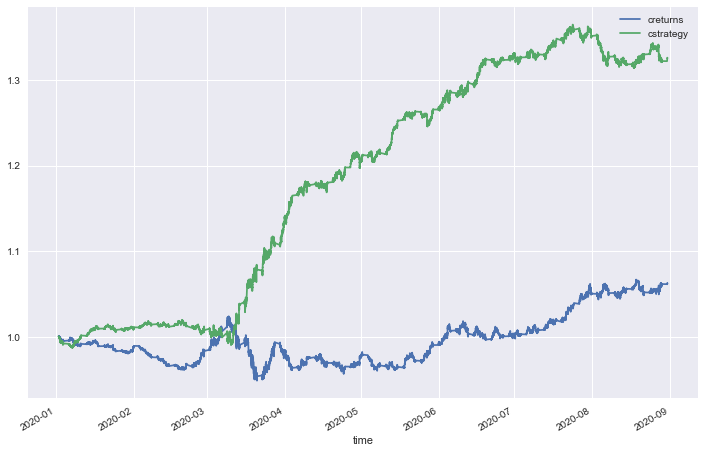

In [84]:
test[['creturns', 'cstrategy']].plot(figsize=(12,8))
plt.show()